# Análisis exploratorio de una base de datos de películas

Usa la base de datos `./data/imdb.csv`


### 1. Importar `pandas`, `matplotlib` y `numpy`

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### 2. Leer la base de datos del archivo csv a pandas

In [6]:
df = pd.read_csv("./data/imdb.csv")

### 3. Mostrar las  primeras y últimas filas del dataframe. Hacerlo con el valor default y pasando como argumento el número entero de filas que se deseen inspeccionar.

In [7]:
print(df.head())
print(df.tail())
print(df.head(10))
print(df.tail(10))

   Rank                    Title                     Genre  \
0     1  Guardians of the Galaxy   Action,Adventure,Sci-Fi   
1     2               Prometheus  Adventure,Mystery,Sci-Fi   
2     3                    Split           Horror,Thriller   
3     4                     Sing   Animation,Comedy,Family   
4     5            Suicide Squad  Action,Adventure,Fantasy   

                                         Description              Director  \
0  A group of intergalactic criminals are forced ...            James Gunn   
1  Following clues to the origin of mankind, a te...          Ridley Scott   
2  Three girls are kidnapped by a man with a diag...    M. Night Shyamalan   
3  In a city of humanoid animals, a hustling thea...  Christophe Lourdelet   
4  A secret government agency recruits some of th...            David Ayer   

                                              Actors  Year  Runtime (Minutes)  \
0  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...  2014                121

### 4. Continúa inspeccionando el archivo viendo todas las columnas del dataframe

In [8]:
print(df.columns)

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='str')


### 5. Imprime los primeros valores de la variable `Rank`

In [9]:
print(df['Rank'].head())

0    1
1    2
2    3
3    4
4    5
Name: Rank, dtype: int64


### 6. Demuestra que es mejor tener nombres de columnas sin espacios (notación corchetes y notación punto-variable).

In [14]:
print(df['Runtime (Minutes)'].head())

KeyError: 'Runtime (Minutes)'

### 7. Renombra las columnas que tengan espacios

In [11]:
df.columns = [c.replace(' ', '_') for c in df.columns]

### 8. Utiliza tus nuevas columnas sin espacios :)

In [16]:
print(df.Runtime_Minutes.head())


AttributeError: 'DataFrame' object has no attribute 'Runtime_Minutes'

### 9. Visualiza la info de todo tu dataframe

In [17]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   str    
 2   Genre               1000 non-null   str    
 3   Description         1000 non-null   str    
 4   Director            1000 non-null   str    
 5   Actors              1000 non-null   str    
 6   Year                1000 non-null   int64  
 7   Runtime_(Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue_(Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), str(5)
memory usage: 93.9 KB


### 10. Inspecciona si hay columnas que tengan valores `NA`

In [18]:
print(df.isnull().sum())

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime_(Minutes)       0
Rating                  0
Votes                   0
Revenue_(Millions)    128
Metascore              64
dtype: int64


### 11. Imprime el número total de valores NA que haya en cada columna. Hazlo primero para la columna `Metascore` y después utiliza un ciclo for para hacerlo para todas las columnas

In [19]:
print(f"Nulos en Metascore: {df['Metascore'].isnull().sum()}")


for col in df.columns:
    print(f"{col}: {df[col].isnull().sum()}")

Nulos en Metascore: 64
Rank: 0
Title: 0
Genre: 0
Description: 0
Director: 0
Actors: 0
Year: 0
Runtime_(Minutes): 0
Rating: 0
Votes: 0
Revenue_(Millions): 128
Metascore: 64


### 12. Usa la magia de `dropna()`

In [20]:

df.dropna(inplace=True)


print(df.isnull().sum().sum())

0


### 13. Vuelve a ver la info del dataset

In [21]:
df.info()

<class 'pandas.DataFrame'>
Index: 838 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                838 non-null    int64  
 1   Title               838 non-null    str    
 2   Genre               838 non-null    str    
 3   Description         838 non-null    str    
 4   Director            838 non-null    str    
 5   Actors              838 non-null    str    
 6   Year                838 non-null    int64  
 7   Runtime_(Minutes)   838 non-null    int64  
 8   Rating              838 non-null    float64
 9   Votes               838 non-null    int64  
 10  Revenue_(Millions)  838 non-null    float64
 11  Metascore           838 non-null    float64
dtypes: float64(3), int64(4), str(5)
memory usage: 85.1 KB


### 14. Genera estadísticos descriptivos con el método `describe()`

In [22]:
print(df.describe())

              Rank        Year  Runtime_(Minutes)      Rating         Votes  \
count   838.000000   838.00000         838.000000  838.000000  8.380000e+02   
mean    485.247017  2012.50716         114.638425    6.814320  1.932303e+05   
std     286.572065     3.17236          18.470922    0.877754  1.930990e+05   
min       1.000000  2006.00000          66.000000    1.900000  1.780000e+02   
25%     238.250000  2010.00000         101.000000    6.300000  6.127650e+04   
50%     475.500000  2013.00000         112.000000    6.900000  1.368795e+05   
75%     729.750000  2015.00000         124.000000    7.500000  2.710830e+05   
max    1000.000000  2016.00000         187.000000    9.000000  1.791916e+06   

       Revenue_(Millions)   Metascore  
count          838.000000  838.000000  
mean            84.564558   59.575179  
std            104.520227   16.952416  
min              0.000000   11.000000  
25%             13.967500   47.000000  
50%             48.150000   60.000000  
75%     

### 15. Crea un histograma de la variable Metascore. Utiliza 10 cubetas

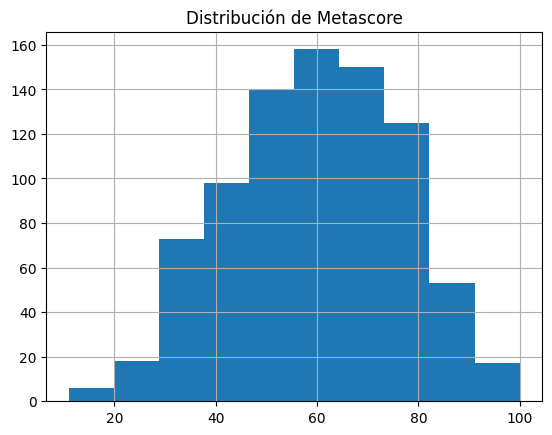

In [23]:
df.Metascore.hist(bins=10)
plt.title("Distribución de Metascore")
plt.show()

### 16. Crea un histograma de la variable Rating. Utiliza 10 cubetas

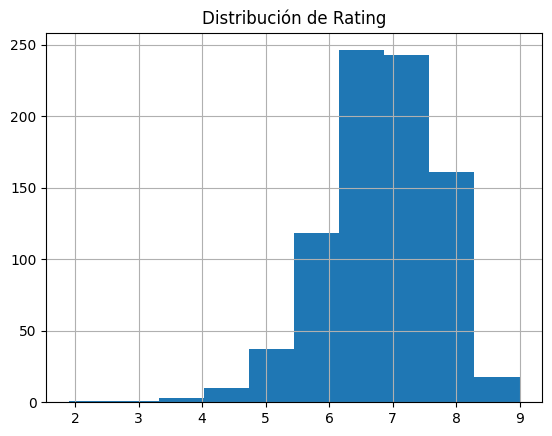

In [24]:
df.Rating.hist(bins=10)
plt.title("Distribución de Rating")
plt.show()

### 17. Vuelve a describir el dataframe y observa la media de la variable `Ratings`

In [25]:
print(df.describe())

              Rank        Year  Runtime_(Minutes)      Rating         Votes  \
count   838.000000   838.00000         838.000000  838.000000  8.380000e+02   
mean    485.247017  2012.50716         114.638425    6.814320  1.932303e+05   
std     286.572065     3.17236          18.470922    0.877754  1.930990e+05   
min       1.000000  2006.00000          66.000000    1.900000  1.780000e+02   
25%     238.250000  2010.00000         101.000000    6.300000  6.127650e+04   
50%     475.500000  2013.00000         112.000000    6.900000  1.368795e+05   
75%     729.750000  2015.00000         124.000000    7.500000  2.710830e+05   
max    1000.000000  2016.00000         187.000000    9.000000  1.791916e+06   

       Revenue_(Millions)   Metascore  
count          838.000000  838.000000  
mean            84.564558   59.575179  
std            104.520227   16.952416  
min              0.000000   11.000000  
25%             13.967500   47.000000  
50%             48.150000   60.000000  
75%     

### 18. Calcula este promedio con Numpy y después con un método de Pandas

In [26]:
print("Media con Numpy:", np.mean(df['Rating']))
print("Media con Pandas:", df['Rating'].mean())

Media con Numpy: 6.814319809069212
Media con Pandas: 6.814319809069212


### 19. Obten los valores únicos de la variable Rating y después ordénalos de menor a mayor

In [27]:
print(sorted(df['Rating'].unique()))

[np.float64(1.9), np.float64(2.7), np.float64(3.9), np.float64(4.0), np.float64(4.1), np.float64(4.3), np.float64(4.4), np.float64(4.6), np.float64(4.7), np.float64(4.8), np.float64(4.9), np.float64(5.0), np.float64(5.1), np.float64(5.2), np.float64(5.3), np.float64(5.4), np.float64(5.5), np.float64(5.6), np.float64(5.7), np.float64(5.8), np.float64(5.9), np.float64(6.0), np.float64(6.1), np.float64(6.2), np.float64(6.3), np.float64(6.4), np.float64(6.5), np.float64(6.6), np.float64(6.7), np.float64(6.8), np.float64(6.9), np.float64(7.0), np.float64(7.1), np.float64(7.2), np.float64(7.3), np.float64(7.4), np.float64(7.5), np.float64(7.6), np.float64(7.7), np.float64(7.8), np.float64(7.9), np.float64(8.0), np.float64(8.1), np.float64(8.2), np.float64(8.3), np.float64(8.4), np.float64(8.5), np.float64(8.6), np.float64(8.8), np.float64(9.0)]


### 20. Observa los ratings que te interesen y ahora filtra el dataframe con ese rating para ver cuáles son las películas con dicho rating

In [28]:
top_movies = df[df['Rating'] == 8.0]
print(top_movies.head())

     Rank         Title                     Genre  \
19     20       Arrival      Drama,Mystery,Sci-Fi   
33     34      Deadpool   Action,Adventure,Comedy   
102   103   The Martian    Adventure,Drama,Sci-Fi   
129   130  The Revenant  Adventure,Drama,Thriller   
140   141     Star Trek   Action,Adventure,Sci-Fi   

                                           Description  \
19   When twelve mysterious spacecraft appear aroun...   
33   A fast-talking mercenary with a morbid sense o...   
102  An astronaut becomes stranded on Mars after hi...   
129  A frontiersman on a fur trading expedition in ...   
140  The brash James T. Kirk tries to live up to hi...   

                        Director  \
19              Denis Villeneuve   
33                    Tim Miller   
102                 Ridley Scott   
129  Alejandro González Iñárritu   
140                  J.J. Abrams   

                                                Actors  Year  \
19   Amy Adams, Jeremy Renner, Forest Whitaker,Mich

### 21. Obten los valores únicos de la variable Rating y la frecuencia total de cada uno de estos valores. Posteriormente crea un nuevo dataframe con essos valores

In [29]:
rating_freq = df.Rating.value_counts().reset_index()
rating_freq.columns = ['rating', 'counts']

### 22. Ordena el nuevo dataframe por la variable `rating`

In [31]:
rating_freq = df.Rating.value_counts().reset_index()
rating_freq.columns = ['rating', 'counts']

### 23. Crea una gráfica de barras con este nuevo dataframe ordenado

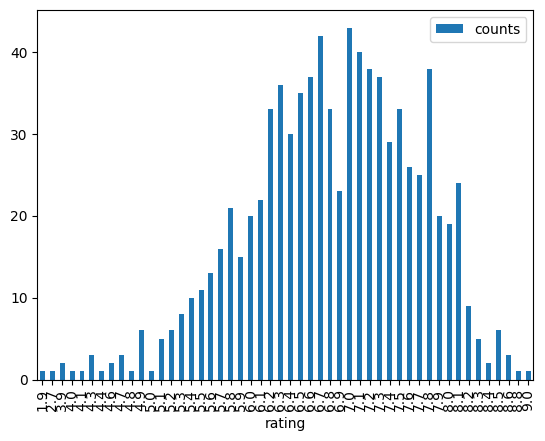

In [30]:
rating_freq.sort_values(by='rating', inplace=True)
rating_freq.plot.bar(x='rating', y='counts')
plt.show()

### 24. Crea la matriz de correlación del dataframe de películas

In [32]:
print(df.select_dtypes(include=[np.number]).corr())

                        Rank      Year  Runtime_(Minutes)    Rating     Votes  \
Rank                1.000000 -0.312809          -0.254783 -0.243125 -0.303284   
Year               -0.312809  1.000000          -0.101933 -0.145703 -0.362445   
Runtime_(Minutes)  -0.254783 -0.101933           1.000000  0.374566  0.399298   
Rating             -0.243125 -0.145703           0.374566  1.000000  0.517452   
Votes              -0.303284 -0.362445           0.399298  0.517452  1.000000   
Revenue_(Millions) -0.273170 -0.129198           0.281721  0.217106  0.636833   
Metascore          -0.195909 -0.062303           0.221397  0.672731  0.332674   

                    Revenue_(Millions)  Metascore  
Rank                         -0.273170  -0.195909  
Year                         -0.129198  -0.062303  
Runtime_(Minutes)             0.281721   0.221397  
Rating                        0.217106   0.672731  
Votes                         0.636833   0.332674  
Revenue_(Millions)            1.000000 

### 25. Grafica la matriz de correlación utilizando `matshow()`

In [36]:
print(df.select_dtypes(include=[np.number]).corr())

                        Rank      Year  Runtime_(Minutes)    Rating     Votes  \
Rank                1.000000 -0.312809          -0.254783 -0.243125 -0.303284   
Year               -0.312809  1.000000          -0.101933 -0.145703 -0.362445   
Runtime_(Minutes)  -0.254783 -0.101933           1.000000  0.374566  0.399298   
Rating             -0.243125 -0.145703           0.374566  1.000000  0.517452   
Votes              -0.303284 -0.362445           0.399298  0.517452  1.000000   
Revenue_(Millions) -0.273170 -0.129198           0.281721  0.217106  0.636833   
Metascore          -0.195909 -0.062303           0.221397  0.672731  0.332674   

                    Revenue_(Millions)  Metascore  
Rank                         -0.273170  -0.195909  
Year                         -0.129198  -0.062303  
Runtime_(Minutes)             0.281721   0.221397  
Rating                        0.217106   0.672731  
Votes                         0.636833   0.332674  
Revenue_(Millions)            1.000000 